**2. Cardiotocography**
---
<https://archive.ics.uci.edu/ml/datasets/Cardiotocography>


In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [48]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion, del_nan

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
image = loadmat('Datasets.mat/Cardiotocography_10class_2129x21.mat')

df = pd.DataFrame(image.get('X'))
df['y'] = image.get('y1').ravel()

In [5]:
X,y, nb_del = del_nan(df.drop('y',axis=1),df['y'])

df = pd.DataFrame(X)
df['y'] = y
print('Number of deleted rows is %d'%nb_del)

Number of deleted rows is 3


In [6]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

In [7]:
len(df)+len(df_test)

2126

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [8]:
image

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 14 20:43:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'y1': array([[ 9.],
        [ 6.],
        [ 6.],
        ...,
        [nan],
        [nan],
        [nan]]),
 'y2': array([[ 2.],
        [ 1.],
        [ 1.],
        ...,
        [nan],
        [nan],
        [nan]]),
 'X': array([[120.,   0.,   0., ..., 121.,  73.,   1.],
        [132.,   4.,   0., ..., 140.,  12.,   0.],
        [133.,   2.,   0., ..., 138.,  13.,   0.],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan, 564., ...,  nan,  nan,  nan]]),
 'Xnames': array([[array(['LB'], dtype='<U2'), array(['AC'], dtype='<U2'),
         array(['FM'], dtype='<U2'), array(['UC'], dtype='<U2'),
         array(['DL'], dtype='<U2'), array(['DS'], dtype='<U2'),
         array(['DP'], dtype='<U2'), array(['ASTV'], dtype='<U4'),
         array(['MSTV'], dtype='<U4'), arra

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 1204 to 395
Data columns (total 22 columns):
0     1700 non-null float64
1     1700 non-null float64
2     1700 non-null float64
3     1700 non-null float64
4     1700 non-null float64
5     1700 non-null float64
6     1700 non-null float64
7     1700 non-null float64
8     1700 non-null float64
9     1700 non-null float64
10    1700 non-null float64
11    1700 non-null float64
12    1700 non-null float64
13    1700 non-null float64
14    1700 non-null float64
15    1700 non-null float64
16    1700 non-null float64
17    1700 non-null float64
18    1700 non-null float64
19    1700 non-null float64
20    1700 non-null float64
y     1700 non-null float64
dtypes: float64(22)
memory usage: 305.5 KB


In [10]:
df.describe()

0            1            2            3            4  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean    133.182353     2.738824     7.797647     3.675882     1.591176   
std       9.871078     3.600735    38.770285     2.876137     2.514334   
min     106.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     1.000000     0.000000   
50%     133.000000     1.000000     0.000000     3.000000     0.000000   
75%     140.000000     4.000000     2.000000     5.000000     3.000000   
max     160.000000    26.000000   564.000000    23.000000    16.000000   

                 5            6            7            8            9  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.002941     0.126471    47.140000     1.340588     9.791765   
std       0.054169     0.467803    17.163698     0.893018    18.453324   
min       0.000000     0.000000    12.000000     0.200000     0.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    50.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    10.000000   
max       1.000000     4.000000    87.000000     6.900000    91.000000   

          ...                12           13           14           15  \
count     ...       1700.000000  1700.000000  1700.000000  1700.000000   
mean      ...         93.349412   163.910000     4.090000     0.330000   
std       ...         29.408695    17.991418     2.958336     0.730191   
min       ...         50.000000   122.000000     0.000000     0.000000   
25%       ...         67.000000   152.000000     2.000000     0.000000   
50%       ...         93.000000   162.000000     3.000000     0.000000   
75%       ...        120.000000   174.000000     6.000000     0.000000   
max       ...        159.000000   238.000000    16.000000    10.000000   

                16           17           18           19           20  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean    137.294706   134.411176   137.960000    18.902941     0.325294   
std      16.478594    15.599565    14.413985    29.689396     0.608510   
min      60.000000    73.000000    77.000000     0.000000    -1.000000   
25%     129.000000   125.000000   128.000000     2.000000     0.000000   
50%     139.000000   136.000000   139.000000     7.000000     0.000000   
75%     148.000000   145.000000   148.000000    24.000000     1.000000   
max     187.000000   178.000000   180.000000   269.000000     1.000000   

                 y  
count  1700.000000  
mean      4.511176  
std       3.028099  
min       1.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max      10.000000  

[8 rows x 22 columns]

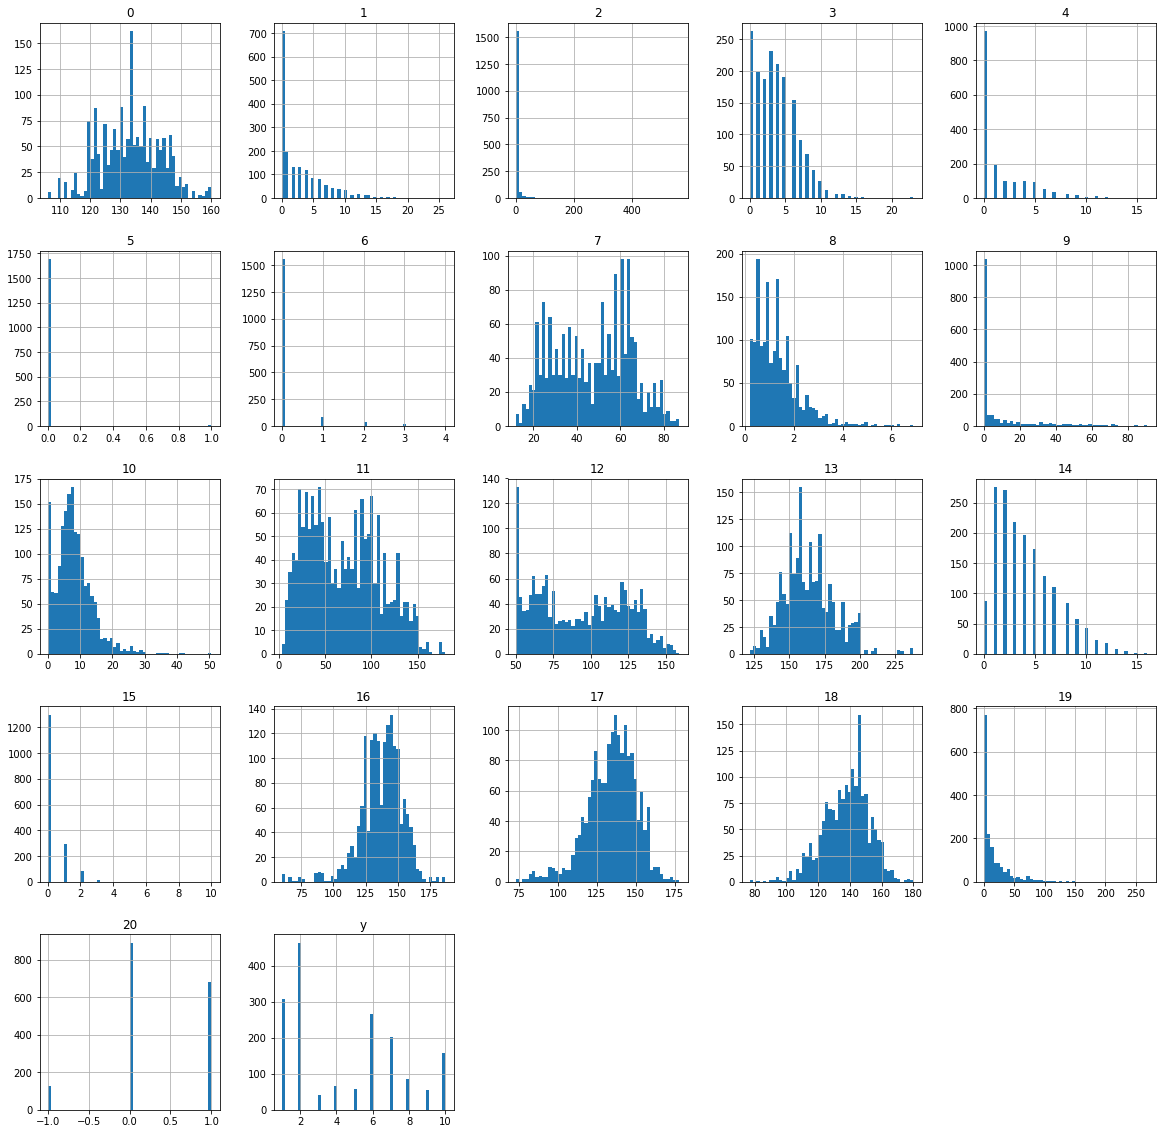

In [11]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

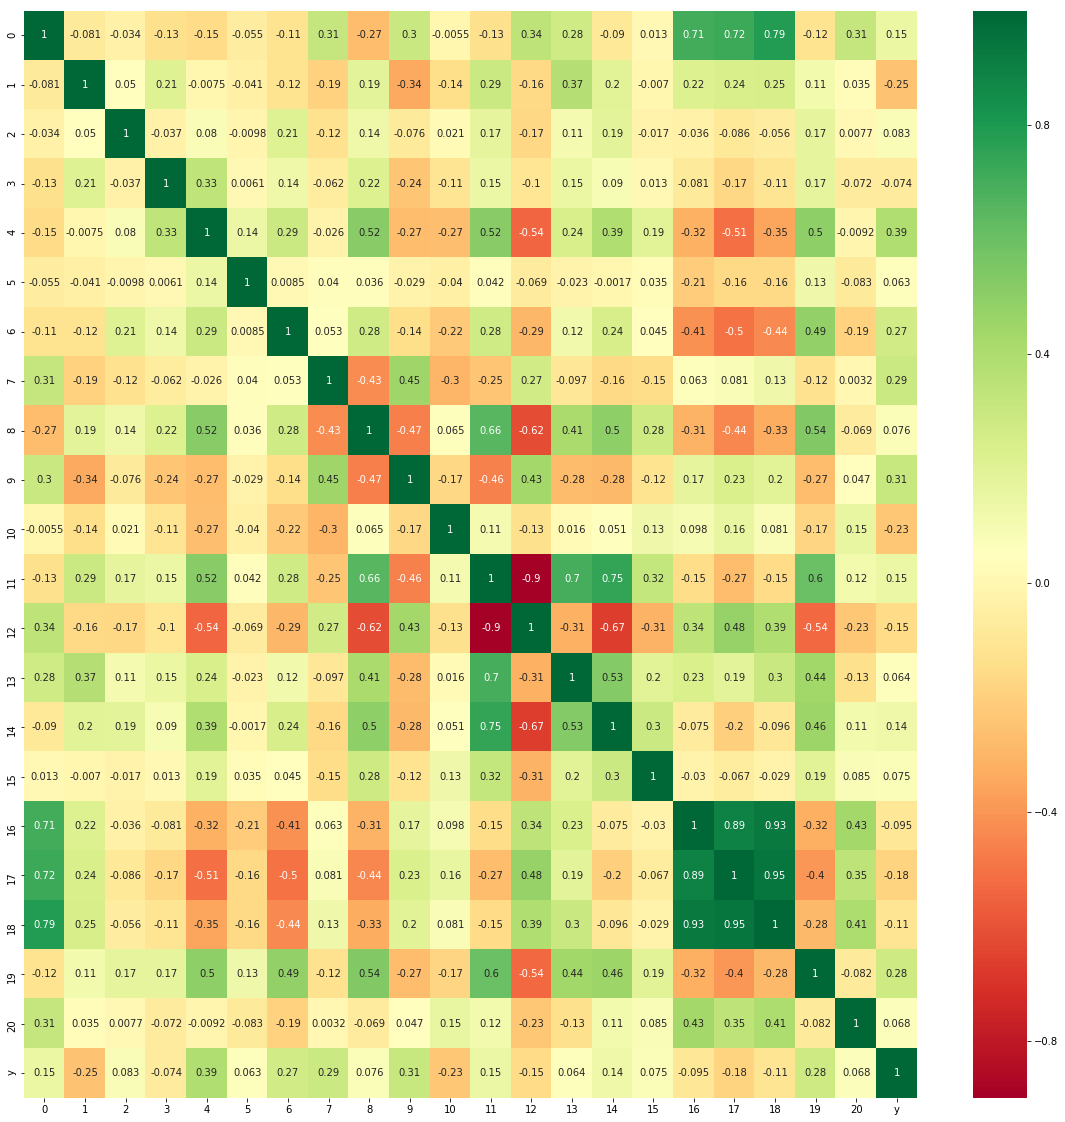

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [13]:
corrmat['y'].sort_values(ascending=True)

1    -0.250368
10   -0.233685
17   -0.184875
12   -0.154769
18   -0.109664
16   -0.094507
3    -0.073890
5     0.062595
13    0.063603
20    0.068459
15    0.074596
8     0.076187
2     0.082837
14    0.139015
11    0.146008
0     0.148502
6     0.270948
19    0.281532
7     0.290810
9     0.305484
4     0.391344
y     1.000000
Name: y, dtype: float64

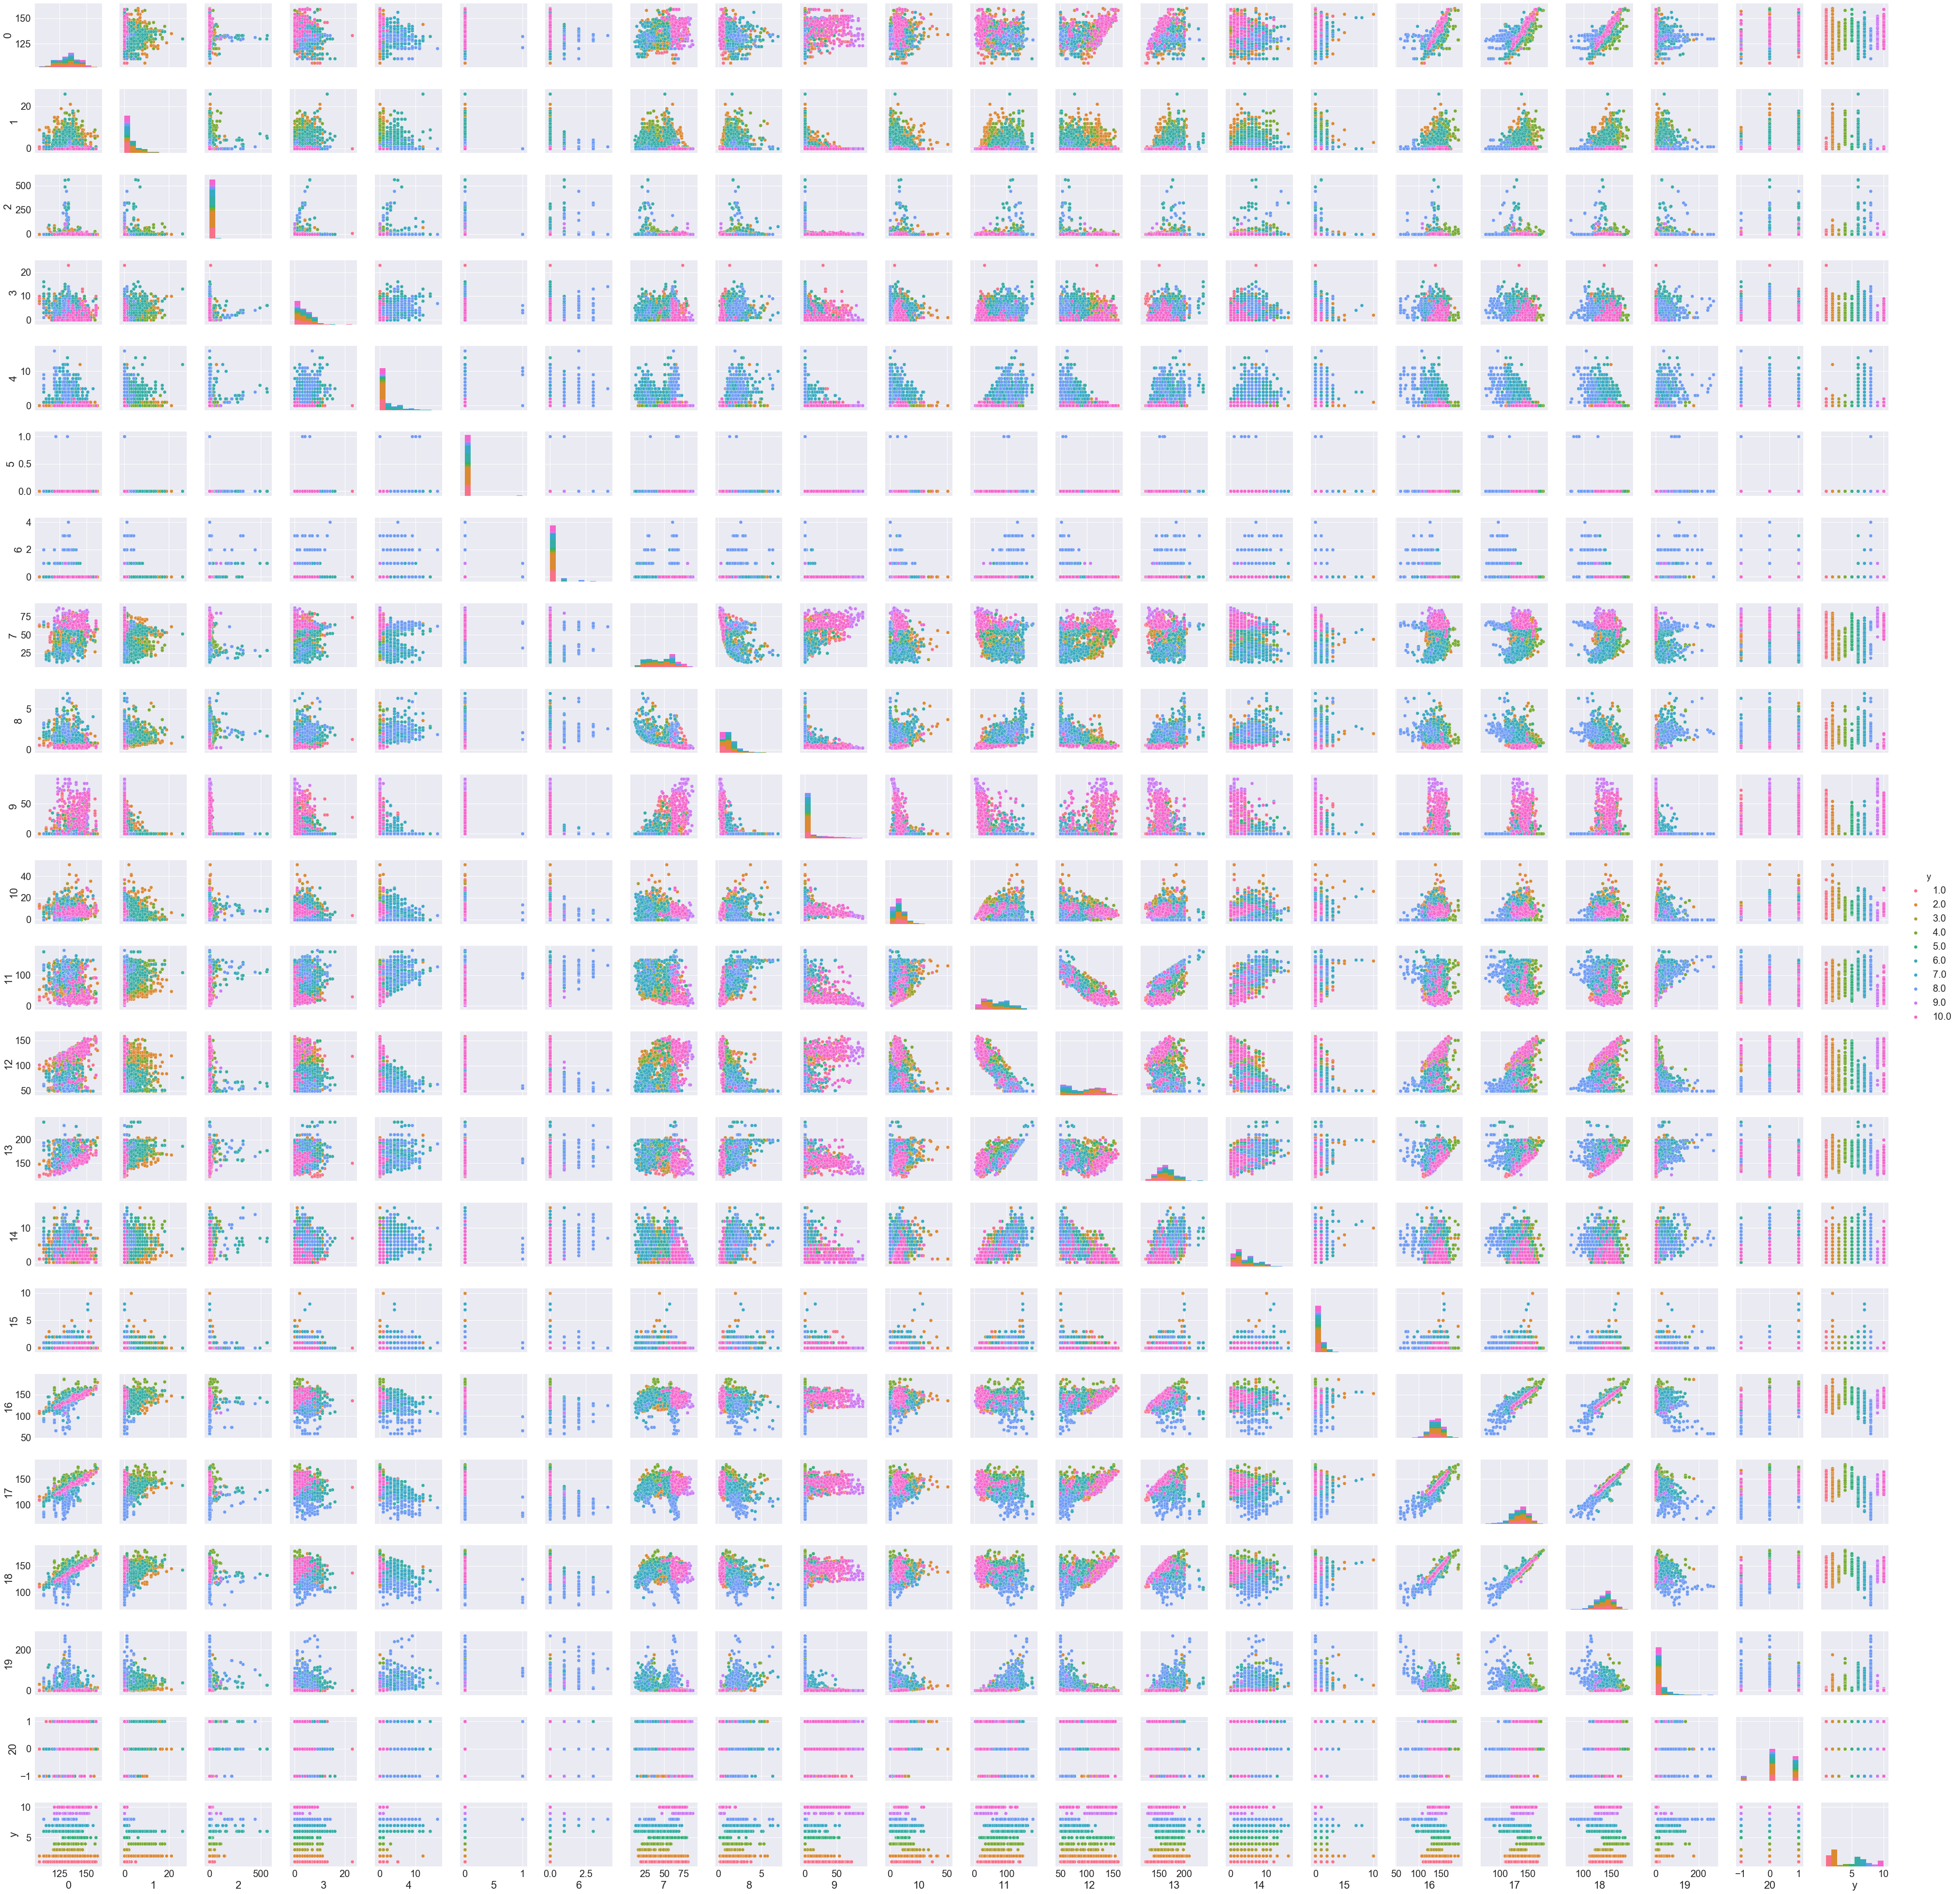

In [14]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df, hue='y')

In [15]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2.0     0.272353
1.0     0.180588
6.0     0.155882
7.0     0.118235
10.0    0.092941
8.0     0.050588
4.0     0.038235
5.0     0.034118
9.0     0.032353
3.0     0.024706
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [16]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [46]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.603 (+/- 0.022)
The IQR is 0.038 between [0.58,0.62]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.69      0.46      0.55      3070
         2.0       0.72      0.49      0.58      4630
         3.0       0.40      0.69      0.51       420
         4.0       0.26      0.97      0.41       650
         5.0       0.31      0.66      0.42       580
         6.0       0.92      0.70      0.79      2650
         7.0       0.89      0.78      0.83      2010
         8.0       0.86      0.90      0.88       860
         9.0       0.32      0.75      0.45       550
        10.0       0.46      0.42      0.44      1580

    accuracy                           0.60     17000
   macro avg       0.58      0.68      0.59     17000
weighted avg       0.69      0.60      0.62     17000

The average training time is 0.010935 seconds


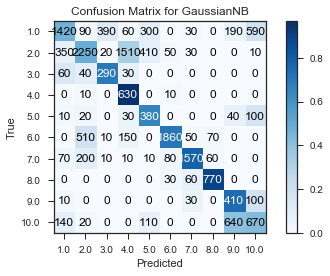

In [18]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), df['y'], classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.63
              precision    recall  f1-score   support

         1.0       0.58      0.76      0.66        59
         2.0       0.47      0.71      0.57        77
         3.0       0.82      0.56      0.67        16
         4.0       1.00      0.24      0.39        66
         5.0       0.57      0.31      0.40        26
         6.0       0.64      0.93      0.76        46
         7.0       0.75      0.86      0.80        44
         8.0       0.95      0.91      0.93        22
         9.0       0.93      0.37      0.53        35
        10.0       0.51      0.57      0.54        35

    accuracy                           0.63       426
   macro avg       0.72      0.62      0.63       426
weighted avg       0.70      0.63      0.61       426



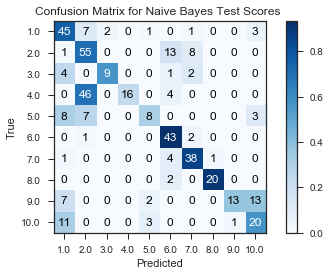

In [19]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.713 (+/- 0.015)
The IQR is 0.031 between [0.70,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.59      0.78      0.68      3070
         2.0       0.72      0.93      0.81      4630
         3.0       0.00      0.00      0.00       420
         4.0       0.88      0.11      0.19       650
         5.0       0.00      0.00      0.00       580
         6.0       0.87      0.77      0.82      2650
         7.0       0.77      0.77      0.77      2010
         8.0       0.88      0.81      0.84       860
         9.0       0.89      0.31      0.46       550
        10.0       0.58      0.55      0.56      1580

    accuracy                           0.71     17000
   macro avg       0.62      0.50      0.51     17000
weighted avg       0.69      0.71      0.68     17000

The average training time is 0.067924 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


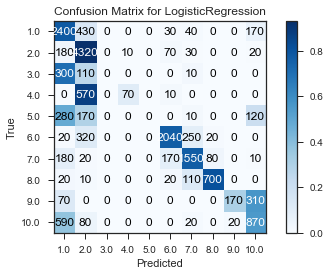

In [20]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear',
                                                                                 multi_class = 'ovr'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [21]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.74
              precision    recall  f1-score   support

         1.0       0.86      0.63      0.73       104
         2.0       0.97      0.75      0.85       151
         3.0       0.00      0.00      0.00         0
         4.0       0.19      1.00      0.32         3
         5.0       0.00      0.00      0.00         0
         6.0       0.66      0.88      0.75        50
         7.0       0.80      0.77      0.79        53
         8.0       0.81      0.94      0.87        18
         9.0       0.21      0.60      0.32         5
        10.0       0.69      0.64      0.67        42

    accuracy                           0.74       426
   macro avg       0.52      0.62      0.53       426
weighted avg       0.84      0.74      0.77       426



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
ipynb.fs.defs.main_functions:40: RuntimeWarning: invalid value encountered in true_divide


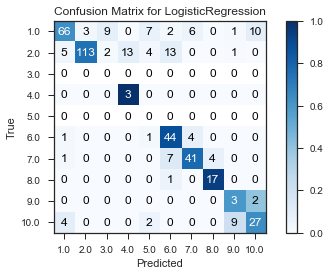

In [22]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear',  multi_class = 'ovr')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.890 (+/- 0.031)
The IQR is 0.059 between [0.86,0.92]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.84      0.91      0.87      3070
         2.0       0.90      0.94      0.92      4630
         3.0       0.77      0.64      0.70       420
         4.0       0.95      0.69      0.80       650
         5.0       0.76      0.52      0.62       580
         6.0       0.96      0.92      0.94      2650
         7.0       0.89      0.96      0.93      2010
         8.0       0.97      0.91      0.94       860
         9.0       0.89      0.81      0.85       550
        10.0       0.85      0.88      0.87      1580

    accuracy                           0.89     17000
   macro avg       0.88      0.82      0.84     17000
weighted avg       0.89      0.89      0.89     17000

The average training time is 1.497042 seconds


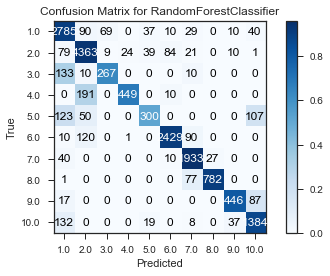

In [23]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500, n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.90
              precision    recall  f1-score   support

         1.0       0.94      0.79      0.86        91
         2.0       0.96      0.93      0.94       119
         3.0       0.64      0.88      0.74         8
         4.0       0.75      0.92      0.83        13
         5.0       0.43      0.75      0.55         8
         6.0       0.88      0.94      0.91        63
         7.0       0.92      0.96      0.94        49
         8.0       1.00      1.00      1.00        21
         9.0       0.86      0.92      0.89        13
        10.0       0.92      0.88      0.90        41

    accuracy                           0.90       426
   macro avg       0.83      0.90      0.85       426
weighted avg       0.91      0.90      0.90       426



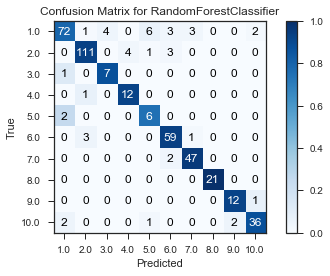

In [24]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.540 (+/- 0.067)
The IQR is 0.094 between [0.51,0.60]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.41      0.90      0.57      3070
         2.0       0.65      0.79      0.72      4630
         3.0       0.00      0.00      0.00       420
         4.0       0.05      0.02      0.02       650
         5.0       0.00      0.00      0.00       580
         6.0       0.46      0.35      0.40      2650
         7.0       0.72      0.42      0.53      2010
         8.0       0.80      0.83      0.81       860
         9.0       0.56      0.16      0.25       550
        10.0       0.59      0.10      0.17      1580

    accuracy                           0.54     17000
   macro avg       0.43      0.36      0.35     17000
weighted avg       0.53      0.54      0.49     17000

The average training time is 1.039135 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


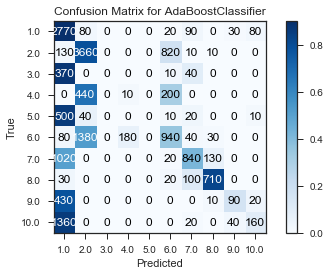

In [25]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), np.array(df['y']),
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.50
              precision    recall  f1-score   support

         1.0       0.99      0.37      0.54       203
         2.0       0.99      0.64      0.77       181
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00        13
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.12      0.46      0.19        13
         8.0       0.76      1.00      0.86        16
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0

    accuracy                           0.50       426
   macro avg       0.29      0.25      0.24       426
weighted avg       0.92      0.50      0.63       426



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
ipynb.fs.defs.main_functions:40: RuntimeWarning: invalid value encountered in true_divide


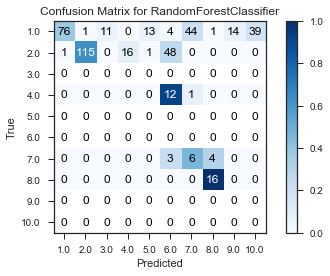

In [26]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [27]:
np.shape(df['y'])

(1700,)

The model score is 0.767 (+/- 0.029)
The IQR is 0.048 between [0.74,0.79]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.73      0.77      0.75      3070
         2.0       0.80      0.81      0.81      4630
         3.0       0.50      0.43      0.46       420
         4.0       0.82      0.72      0.77       650
         5.0       0.38      0.36      0.37       580
         6.0       0.84      0.77      0.80      2650
         7.0       0.76      0.83      0.79      2010
         8.0       0.94      0.88      0.91       860
         9.0       0.84      0.75      0.79       550
        10.0       0.73      0.75      0.74      1580

    accuracy                           0.77     17000
   macro avg       0.73      0.71      0.72     17000
weighted avg       0.77      0.77      0.77     17000

The model score is 0.707 (+/- 0.048)
The IQR is 0.081 between [0.67,0.75]
There is 0 deleted rows
              precision    recall  f1-score  

The model score is 0.705 (+/- 0.031)
The IQR is 0.047 between [0.69,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.61      0.70      0.65      3070
         2.0       0.71      0.86      0.77      4630
         3.0       0.43      0.07      0.12       420
         4.0       0.91      0.48      0.63       650
         5.0       0.27      0.05      0.09       580
         6.0       0.77      0.77      0.77      2650
         7.0       0.73      0.73      0.73      2010
         8.0       0.97      0.76      0.85       860
         9.0       0.81      0.47      0.60       550
        10.0       0.63      0.70      0.67      1580

    accuracy                           0.71     17000
   macro avg       0.69      0.56      0.59     17000
weighted avg       0.70      0.71      0.69     17000

The model score is 0.700 (+/- 0.032)
The IQR is 0.053 between [0.67,0.73]
There is 0 deleted rows
              precision    recall  f1-score  

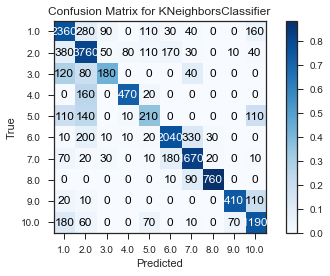

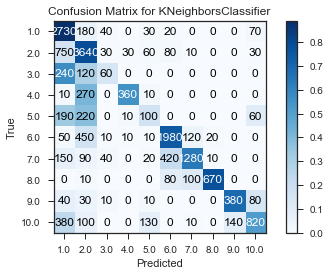

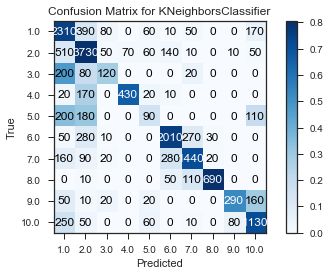

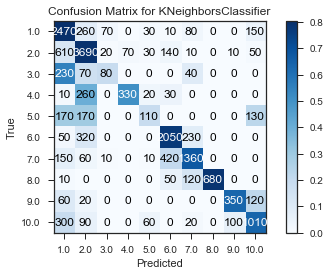

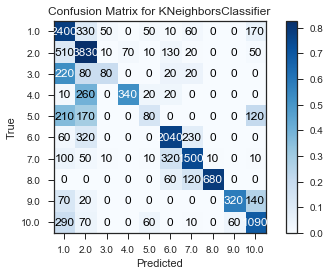

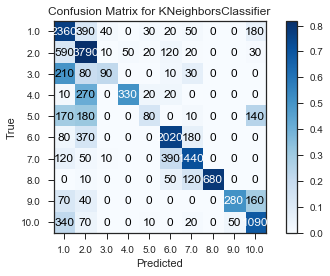

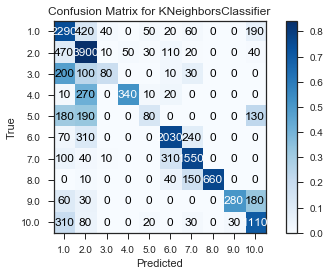

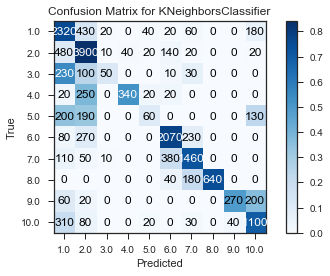

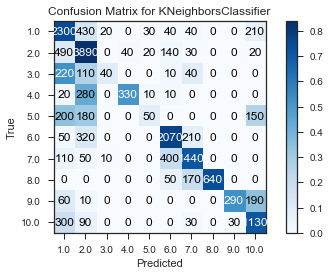

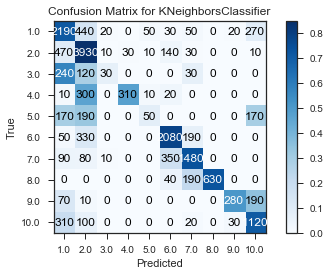

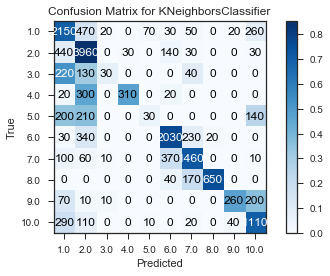

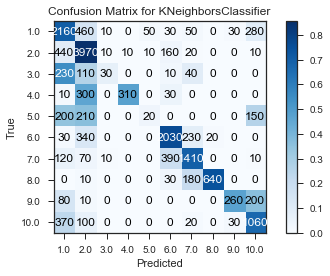

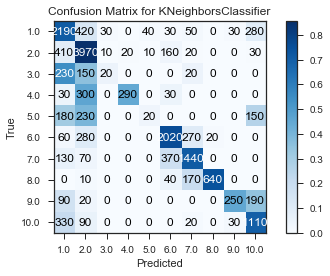

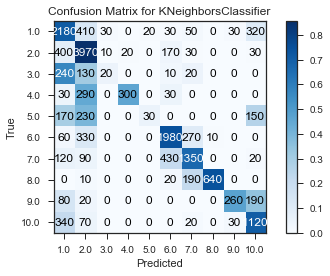

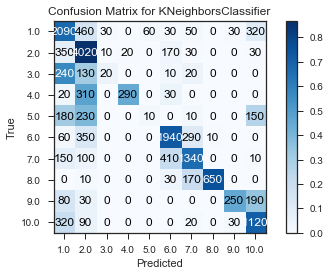

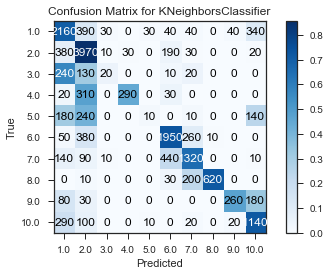

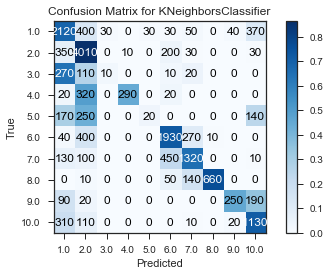

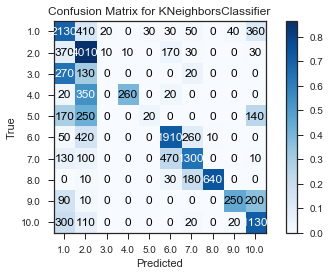

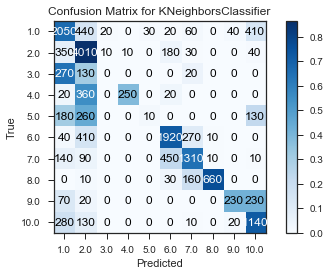

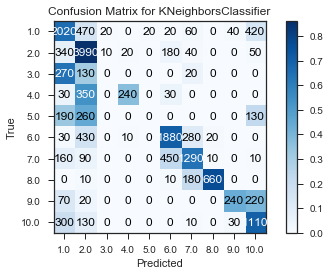

In [28]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

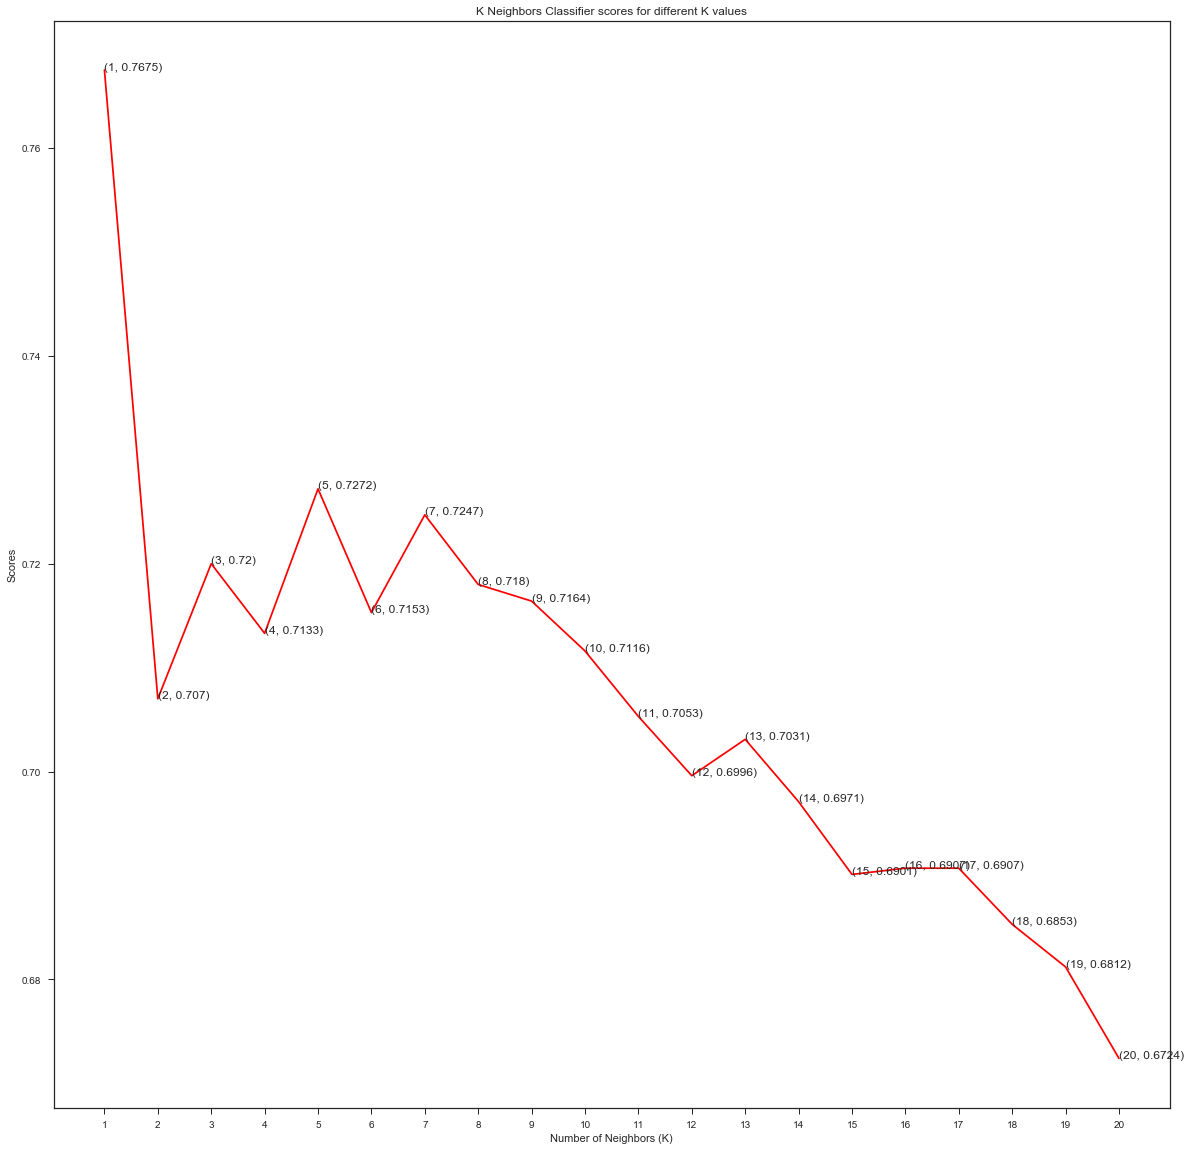

In [29]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.767 (+/- 0.029)
The IQR is 0.048 between [0.74,0.79]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.73      0.77      0.75      3070
         2.0       0.80      0.81      0.81      4630
         3.0       0.50      0.43      0.46       420
         4.0       0.82      0.72      0.77       650
         5.0       0.38      0.36      0.37       580
         6.0       0.84      0.77      0.80      2650
         7.0       0.76      0.83      0.79      2010
         8.0       0.94      0.88      0.91       860
         9.0       0.84      0.75      0.79       550
        10.0       0.73      0.75      0.74      1580

    accuracy                           0.77     17000
   macro avg       0.73      0.71      0.72     17000
weighted avg       0.77      0.77      0.77     17000

The average training time is 0.005932 seconds


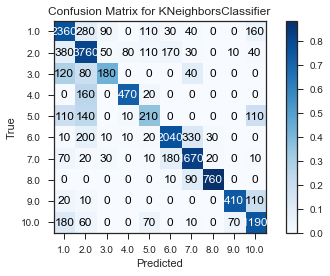

In [30]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 0.7418
              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70        77
         2.0       0.85      0.74      0.80       133
         3.0       0.45      0.71      0.56         7
         4.0       0.81      0.76      0.79        17
         5.0       0.36      0.50      0.42        10
         6.0       0.66      0.73      0.69        60
         7.0       0.76      0.76      0.76        51
         8.0       0.90      0.90      0.90        21
         9.0       0.71      0.71      0.71        14
        10.0       0.72      0.78      0.75        36

    accuracy                           0.74       426
   macro avg       0.69      0.73      0.71       426
weighted avg       0.75      0.74      0.75       426



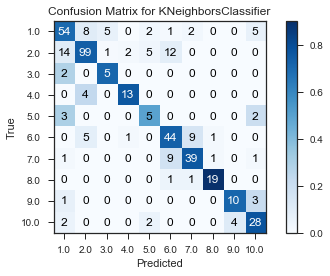

In [31]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [32]:
from time import time

In [33]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 139.764018 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.842 (+/- 0.026)
The IQR is 0.044 between [0.82,0.86]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.72      0.81      0.76      3070
         2.0       0.90      0.94      0.92      4630
         3.0       0.60      0.43      0.50       420
         4.0       0.83      0.77      0.80       650
         5.0       0.81      0.66      0.72       580
         6.0       0.96      0.88      0.92      2650
         7.0       0.89      0.93      0.91      2010
         8.0       0.94      0.91      0.92       860
         9.0       0.82      0.65      0.73       550
        10.0       0.69      0.68      0.69      1580

    accuracy                           0.84     17000
   macro avg       0.82      0.77      0.79     17000
weighted avg       0.84      0.84      0.84     17000

The average training time is 0.107849 seconds


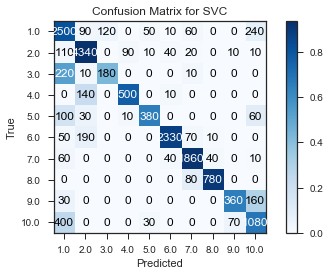

In [34]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [35]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.42470588235294116 {'C': 0.03125}
0.5682352941176471 {'C': 0.0625}
0.6670588235294118 {'C': 0.125}
0.6935294117647058 {'C': 0.25}
0.7411764705882353 {'C': 0.5}
0.7688235294117647 {'C': 1.0}
0.7958823529411765 {'C': 2.0}
0.8123529411764706 {'C': 4.0}
0.8223529411764706 {'C': 8.0}
0.8235294117647058 {'C': 16.0}
0.8394117647058823 {'C': 32.0}
0.841764705882353 {'C': 64.0}
0.8364705882352941 {'C': 128.0}
0.8352941176470589 {'C': 256.0}
0.8352941176470589 {'C': 512.0}
0.8370588235294117 {'C': 1024.0}
0.8323529411764706 {'C': 2048.0}
0.8235294117647058 {'C': 4096.0}
0.8223529411764706 {'C': 8192.0}
0.8247058823529412 {'C': 16384.0}
0.8270588235294117 {'C': 32768.0}


The test accuracy is 0.8521
              precision    recall  f1-score   support

         1.0       0.86      0.76      0.80        87
         2.0       0.94      0.94      0.94       116
         3.0       0.55      0.75      0.63         8
         4.0       0.81      0.81      0.81        16
         5.0       0.57      0.57      0.57        14
         6.0       0.87      0.95      0.91        61
         7.0       0.88      0.90      0.89        50
         8.0       0.95      0.95      0.95        21
         9.0       0.79      0.65      0.71        17
        10.0       0.69      0.75      0.72        36

    accuracy                           0.85       426
   macro avg       0.79      0.80      0.79       426
weighted avg       0.85      0.85      0.85       426



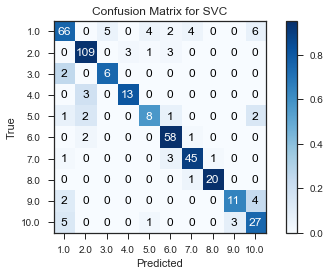

In [49]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [37]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 329.305606 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.864 (+/- 0.024)
The IQR is 0.030 between [0.85,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.80      0.82      0.81      3070
         2.0       0.90      0.93      0.92      4630
         3.0       0.62      0.67      0.64       420
         4.0       0.86      0.83      0.84       650
         5.0       0.74      0.64      0.69       580
         6.0       0.90      0.89      0.90      2650
         7.0       0.91      0.89      0.90      2010
         8.0       0.95      0.93      0.94       860
         9.0       0.96      0.80      0.87       550
        10.0       0.79      0.82      0.80      1580

    accuracy                           0.86     17000
   macro avg       0.84      0.82      0.83     17000
weighted avg       0.87      0.86      0.86     17000

The average training time is 0.125115 seconds


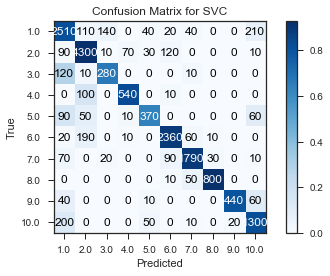

In [38]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.8732
              precision    recall  f1-score   support

         1.0       0.87      0.83      0.85        81
         2.0       0.97      0.94      0.95       119
         3.0       0.73      0.80      0.76        10
         4.0       0.88      0.93      0.90        15
         5.0       0.64      0.53      0.58        17
         6.0       0.85      0.93      0.89        61
         7.0       0.90      0.90      0.90        51
         8.0       0.95      0.95      0.95        21
         9.0       0.79      0.79      0.79        14
        10.0       0.72      0.76      0.74        37

    accuracy                           0.87       426
   macro avg       0.83      0.84      0.83       426
weighted avg       0.87      0.87      0.87       426



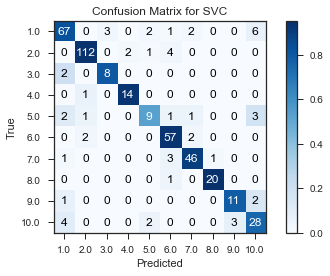

In [39]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

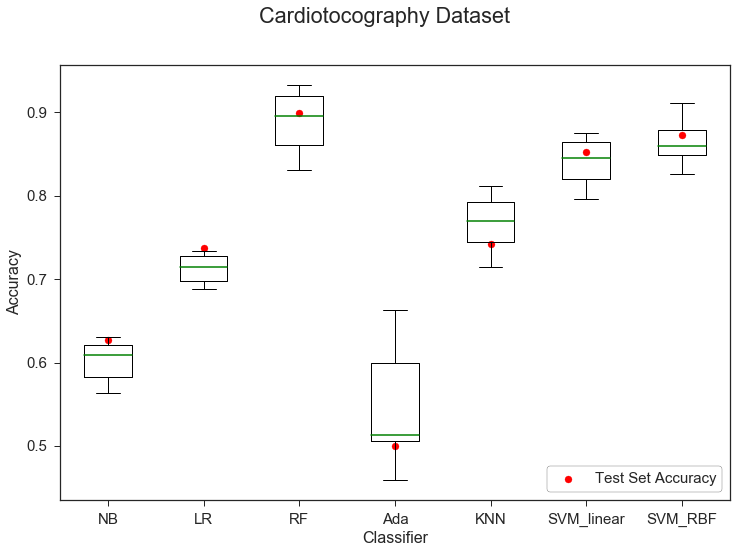

In [50]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Cardiotocography Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black', loc='lower right')
# ax.set_ylim([0.4,1])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [41]:
test_results

[0.6267605633802817,
 0.7370892018779343,
 0.8990610328638498,
 0.5,
 0.7417840375586855,
 0.852112676056338,
 0.8732394366197183]

In [42]:
pd.DataFrame([0.5492957746478874,
 0.7417840375586855,
 0.9225352112676056,
 0.6103286384976526,
 0.7769953051643192,
 0.8708920187793427,
 0.8849765258215962])

0
0  0.549296
1  0.741784
2  0.922535
3  0.610329
4  0.776995
5  0.870892
6  0.884977

In [43]:
val_cardio = [val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]
%store val_cardio

Stored 'val_cardio' (list)
